In [1]:
from pandas import Series, DataFrame
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# NYC Restaurants

In [2]:
#read in the data from csv, and print out the column names
restaurants = pd.read_csv("NYC_Restaurants.csv", dtype=unicode)
for index, item in enumerate(restaurants.columns.values):
    print index, item

0 Unnamed: 0
1 CAMIS
2 DBA
3 BORO
4 BUILDING
5 STREET
6 ZIPCODE
7 PHONE
8 CUISINE DESCRIPTION
9 INSPECTION DATE
10 ACTION
11 VIOLATION CODE
12 VIOLATION DESCRIPTION
13 CRITICAL FLAG
14 SCORE
15 GRADE
16 GRADE DATE
17 RECORD DATE
18 INSPECTION TYPE


## Question 1: Create a unique name for each restaurant

The `dataframe.apply(func, axis=1)` function takes series arguments and applies `func` on these series. With this function, it is easy to concatenate several columns, and then assign the new column to the `restaurants` dataframe.

In [3]:
#use .apply() method to combine the 4 columns to get the unique restaurant name
restaurants["RESTAURANT"] = restaurants[["DBA", "BUILDING", "STREET", "ZIPCODE"]].\
                                        apply(lambda x: "{} {} {} {}".format(x[0], x[1], x[2], x[3]), axis=1)

#incase that the RESTAURANT names contain spaces or symbols, strip off them
restaurants["RESTAURANT"] = restaurants["RESTAURANT"].map(lambda y: y.strip())
print restaurants["RESTAURANT"][:10]

0                    WENDY'S 469 FLATBUSH AVENUE 11225
1                    WENDY'S 469 FLATBUSH AVENUE 11225
2                    WENDY'S 469 FLATBUSH AVENUE 11225
3                    WENDY'S 469 FLATBUSH AVENUE 11225
4                    WENDY'S 469 FLATBUSH AVENUE 11225
5               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
6               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
7               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
8               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object


## Question 2: How many restaurants are included in the data?

To answer the question just calculate how many unique values are there in `RESTAURANT` column, which is equaivalent to measuring the length of `.value_counts()`.

In [4]:
print "There are", len(restaurants.drop_duplicates(subset="RESTAURANT")["RESTAURANT"].value_counts()), "restaurants in the data."

There are 10114 restaurants in the data.


## Question 3: How many chains are there?

To calculate the number of chain restaurants, it is convenient to drop the duplicate rows with same `RESTAURANT`,
i.e. the same restaurant appearing more than once, and then calculate the number of `DBA` occuring more than twice.

In [5]:
num_chain = sum(restaurants.drop_duplicates(subset="RESTAURANT")["DBA"].value_counts()>=2)
print "There are", num_chain, "chain restaurants."

There are 368 chain restaurants.


## Question 4: Plot a bar graph of the top 20 most popular chains.

To plot the top 20 most popular chains, we define a helper function `chain` to identify if a given `DBA` is one of the chains, and then take the first 20 `DBA` for plotting.

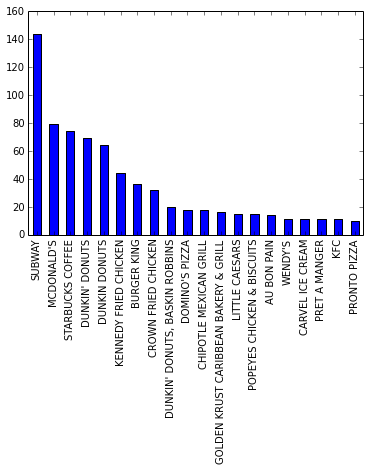

In [6]:
chains = restaurants.drop_duplicates(subset="RESTAURANT")["DBA"].value_counts()[: num_chain].index.values
def chain(restaurant):
     return (restaurant in chains)
mask = restaurants["DBA"].map(chain)
restaurants[mask].drop_duplicates(subset="RESTAURANT")["DBA"].value_counts()[:20].plot(kind="bar")

## Question 5: What fraction of all restaurants are chains?

To calculate the faction of chains among all restaurants, we use an inline mask on `DBA`, and if it is chain, then return `True`, and `sum` up all results to get the number of chains. That is divided by the total number of unique `RESTAURANT` to get the fraction.

In [7]:
print "The percentage of chain restaurants is",
print "{:.2%}".format(sum(restaurants.drop_duplicates(subset="RESTAURANT")["DBA"].value_counts()>=2)/float(len(restaurants["RESTAURANT"].value_counts())))

The percentage of chain restaurants is 3.64%


## Question 6: Plot the number of non-chain restaurants in each boro.

We define a helper function `lower_case` to convert a string series to lower case. This is used to help determine is a `BORO` is "missing", since "missing" could be spelt in many ways. Yet to get the number of non-chain restaurants, we still need to use the `chain` function as a mask. After duplicate `RESTAURANT` are removed, it is ready to count the number in each borough and make a bar plot.

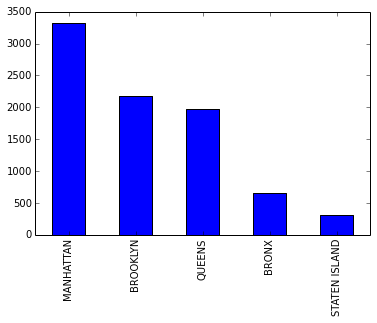

In [8]:
def lower_case(X):
    return X.lower()

mask_1 = restaurants["DBA"].map(chain)
mask_2 = restaurants["BORO"].map(lower_case) != "missing"
restaurants[-mask_1].drop_duplicates(subset="RESTAURANT")[mask_2]["BORO"].value_counts().sort_values(ascending=False).plot(kind="bar")

## Question 7: Plot the fraction of non-chain restaurants in each boro.

Similar to the previous question, we need to calculate the ratio of $\frac{N_{non-chain}}{N_{total}}$ within each borough. This fraction can be done between two series-`value_counts()` of non-chains of `BORO` and `value_counts()` of all unique `RESTAURANT` of `BORO`.
Depending on which borough has the highest ratio, a message will pop out to compare if it is the same with the borough with the most non-chains.

The highest non-chain/total ratio is: 86.20% (BROOKLYN)
It is not the same borough.


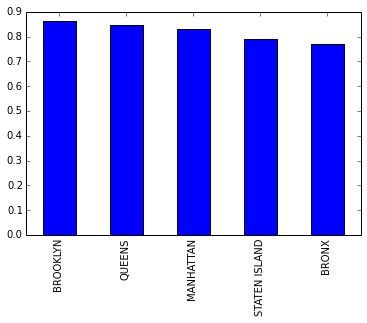

In [9]:
series_tmp_1 = restaurants[mask_2].drop_duplicates(subset="RESTAURANT")["BORO"].value_counts()
series_tmp_2 = restaurants[-mask_1][mask_2].drop_duplicates(subset="RESTAURANT")["BORO"].value_counts()
series_tmp_ratio = series_tmp_2/series_tmp_1
series_tmp_ratio.sort_values(ascending=False).plot(kind="bar")
print "The highest non-chain/total ratio is:", "{:0.2%} ({})".format(series_tmp_ratio.sort_values(ascending=False)[0],\
                                                                     series_tmp_ratio.sort_values(ascending=False).index.values[0])
if series_tmp_ratio.sort_values(ascending=False).index.values[0] !=\
restaurants[-mask_1].drop_duplicates(subset="RESTAURANT")[mask_2]["BORO"].value_counts().sort_values(ascending=False).index.values[0]:
    print "It is not the same borough."
else:
    print "It is the same borough."

## Question 8: Plot the popularity of cuisines.

This plot is relatively simple. Drop duplicate `RESTAURANT` and plot on the top 20 of sorted `value_counts()` of `CUISINE DESCRIPTION.`

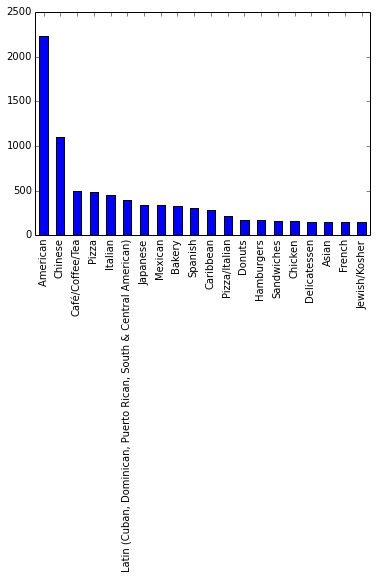

In [10]:
restaurants.drop_duplicates(subset="RESTAURANT")["CUISINE DESCRIPTION"].value_counts()\
                                                                .sort_values(ascending=False)[:20].plot(kind="bar")

## Question 9: Plot the cuisines among restaurants which never got cited for violations.

Here we used a mask to sift out the restaurants whose `VIOLATION CODE` is missing.

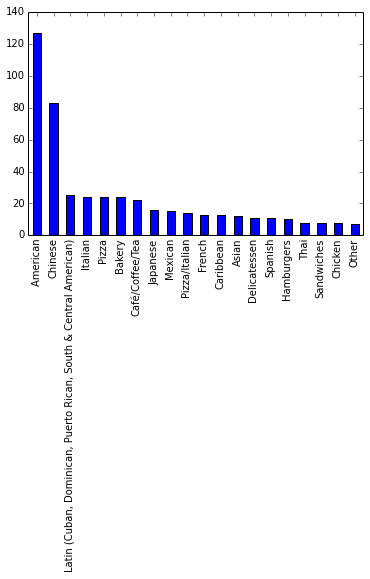

In [11]:
mask_3 = restaurants["VIOLATION CODE"].isnull()
restaurants[mask_3]["CUISINE DESCRIPTION"].value_counts().sort_values(ascending=False)[:20].plot(kind="bar")

## Question 10: What cuisines tend to be the “cleanest”?

Here we use a helper function `is_top_cuisine` to select all the rows with the top 20 most popular cuisines, and then take a series ratio in the form of $\frac{N_{no\ violation}}{N_{inspections}}$. The numerator series is `value_counts()` of top cuisines with missing `VIOLATION CODE`, and the denominator series is `value_counts()` of total inspections of these cuisines. And then the ratio series is plotted out.

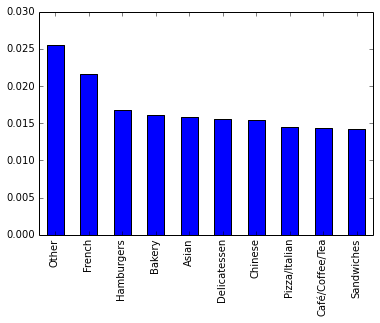

In [12]:
top_cuisines = restaurants[mask_3].drop_duplicates(subset="RESTAURANT")["CUISINE DESCRIPTION"].value_counts()\
                                                            .sort_values(ascending=False)[:20]
def is_top_cuisine(cuisine):
    return cuisine in top_cuisines.index.values
mask_4 = restaurants["CUISINE DESCRIPTION"].map(is_top_cuisine)
series_tmp_3 = restaurants[mask_4][mask_3]["CUISINE DESCRIPTION"].value_counts()
series_tmp_4 = restaurants[mask_4]["CUISINE DESCRIPTION"].value_counts()
(series_tmp_3/series_tmp_4).sort_values(ascending=False)[:10].plot(kind="bar")

## Question 11: What are the most common violations in each borough?

A `crosstab` dataframe is made with `VIOLATION DESCRIPTION` as index, and `BORO` (without "Missing" boroughs) as columns. `dropna` is set `True` so `NaN` will not be recorded.  Every cell in the `crosstab` is the number of occurences of a violation in a certain borough. `idxmax()` method is applied to automatically retrieve the max occurence for each `BORO`.

In [13]:
violation_boro_tab = pd.crosstab(
                        index=restaurants["VIOLATION DESCRIPTION"],
                        columns=restaurants[restaurants["BORO"]!="Missing"]["BORO"],
                        dropna=True
                    )
print "The most common violation in each borough is summarised below:"
violation_boro_tab.idxmax()

The most common violation in each borough is summarised below:


BORO
BRONX            Non-food contact surface improperly constructe...
BROOKLYN         Non-food contact surface improperly constructe...
MANHATTAN        Non-food contact surface improperly constructe...
QUEENS           Non-food contact surface improperly constructe...
STATEN ISLAND    Non-food contact surface improperly constructe...
dtype: object

## Question 12: What are the most common violations per borough, after normalizing for the relative abundance of each violation?

The "normalization" is carried out with `apply()` method, which applies `lambda x: x.map(float)/violation_frequency_series, axis=0` on each column of the above `crosstab`. The denominator is a series of the `value_counts()` of all `VIOLATION DESCRIPTION`.

In [14]:
violation_frequency_series = restaurants["VIOLATION DESCRIPTION"].value_counts()
violation_boro_norm_tab = violation_boro_tab.apply(lambda x: x.map(float)/violation_frequency_series, axis=0)
print "After normalization, the most common violation in each borough is summarised below:"
violation_boro_norm_tab.idxmax()

After normalization, the most common violation in each borough is summarised below:


BORO
BRONX                                  Unprotected food re-served.
BROOKLYN         Precooked potentially hazardous food from comm...
MANHATTAN        Out-of package sale of tobacco products observed.
QUEENS           Caloric content range (minimum to maximum) not...
STATEN ISLAND    Eggs found dirty/cracked; liquid, frozen or po...
dtype: object

## Question 13: How many phone area codes correspond to a single zipcode?

We create a new column `AREA` to store the first 3 digits of `PHONE`, which is the area code. Then we drop duplicate rows with the same combination of `AREA` and `ZIPCODE`. By `value_counts()==1` each `AREA` with a single `ZIPCODE` will return `True`, whose sum is the total number of such area codes.

In [15]:
restaurants["AREA"] = restaurants["PHONE"].map(lambda x: x[:3])
print "There are",
print sum(restaurants.drop_duplicates(subset=["AREA", "ZIPCODE"])["AREA"].value_counts() == 1),
print "area codes corresponding to only 1 zipcode"

There are 34 area codes corresponding to only 1 zipcode


## Question 14: Find common misspellings of street names

After following the assignment instruction, it is found that the `STREET` column in the original dataframe is poorly formatted, with extra spaces, etc. So it is better to `strip` the value in `STREET` before slicing the string. But afterwards, the process largely follows the instruction.
It should be mentioned that `pands.concat` and `pandas.merge` functions are used to construct new dataframes from existing columns. At the end, `idxmax()` method is applied to the `crosstab`, so the most common alias of the specified phrases are returned.

In [16]:
import re
restaurants["STREET TYPE"] = restaurants["STREET"].map(lambda s: re.split(" ", s.strip())[-1])
restaurants["STREET BASE"] = restaurants["STREET"].map(lambda s: " ".join(re.split(" ", s.strip())[:-1]))
restaurants["STREET BASE & ZIP"] = restaurants["STREET BASE"].map(lambda s: s+" ") + restaurants["ZIPCODE"]
new_dataframe = pd.concat(
    [restaurants["STREET BASE"], restaurants["STREET TYPE"], restaurants["STREET BASE & ZIP"]],
    axis=1
)

new_dataframe = new_dataframe[new_dataframe["STREET BASE"].map(lambda s: len(s)>0)].drop_duplicates()

merged_new_dataframe = pd.merge(
                            new_dataframe,
                            new_dataframe,
                            left_on="STREET BASE & ZIP",
                            right_on="STREET BASE & ZIP",
                            suffixes=[" 1", " 2"]
                                )

merged_new_dataframe = merged_new_dataframe[merged_new_dataframe["STREET TYPE 1"] != merged_new_dataframe["STREET TYPE 2"]]

street_name = pd.crosstab(
    index=merged_new_dataframe["STREET TYPE 1"],
    columns=merged_new_dataframe["STREET TYPE 2"],
    dropna=True
)

street_name
print "The most common alias for each of the following street type is listed"
street_name.idxmax()[
    ["AVE", "ST", "RD", "PL", "BOULEARD", "BOULEVARD"]
]

The most common alias for each of the following street type is listed


STREET TYPE 2
AVE          AVENUE
ST           STREET
RD             ROAD
PL            PLACE
BOULEARD       BLVD
BOULEVARD      BLVD
dtype: object